In [70]:
#import libraries tensorflow, keras, numpy, matplotlib
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#load the cıfar-10 dataset from keras.datasets
cifar10 = keras.datasets.cifar10

In [72]:
#split the dataset into training and testing sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [73]:
#check the shape of the training and testing sets
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [74]:
#check the maximum and minimum values of the training and testing sets
print(np.max(train_images))
print(np.min(train_images))
print(np.max(test_images))
print(np.min(test_images))

255
0
255
0


In [75]:
#normalize the training and testing sets
train_images = train_images / 255.0
test_images = test_images / 255.0

#check the maximum and minimum values of the training and testing sets after normalization
print(np.max(train_images))
print(np.min(train_images))
print(np.max(test_images))
print(np.min(test_images))


1.0
0.0
1.0
0.0


In [76]:
 # build CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

In [77]:
#activation function, loss function, optimizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [78]:
#train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4884 - accuracy: 0.4567 - val_loss: 1.2308 - val_accuracy: 0.5646
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1094 - accuracy: 0.6070 - val_loss: 1.0783 - val_accuracy: 0.6299
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9520 - accuracy: 0.6660 - val_loss: 0.9623 - val_accuracy: 0.6642
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8611 - accuracy: 0.6983 - val_loss: 0.8730 - val_accuracy: 0.6981
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7865 - accuracy: 0.7244 - val_loss: 0.8769 - val_accuracy: 0.6975
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7341 - accuracy: 0.7416 - val_loss: 0.8471 - val_accuracy: 0.7095
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6763 - accuracy: 0.7634 - val_loss: 0.8545 - val_ac

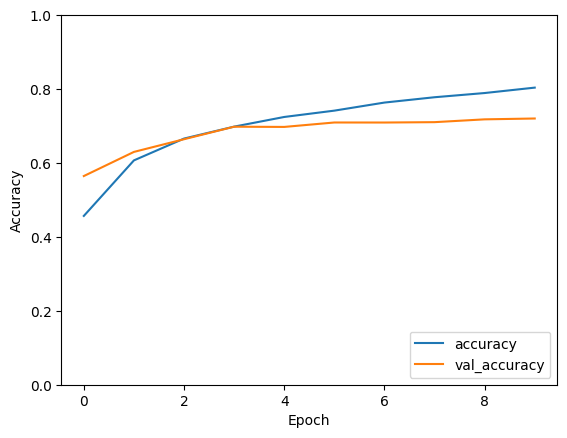

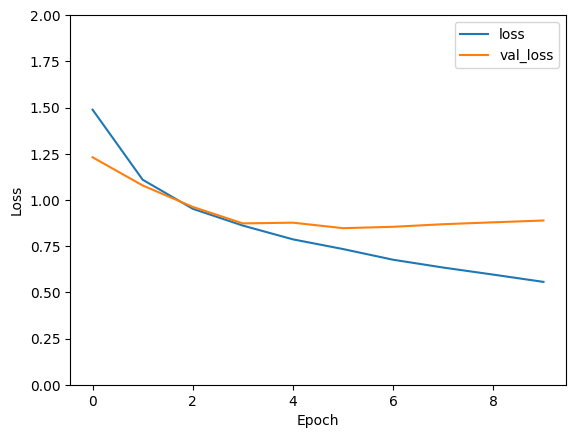

In [79]:
#visualize the training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

#visualize the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.show()

In [80]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.8886 - accuracy: 0.7203 - 667ms/epoch - 2ms/step
0.720300018787384


In [81]:
#save the model
model.save('cifar10_model.keras')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
313/313 [==============================] - 1s 2ms/step


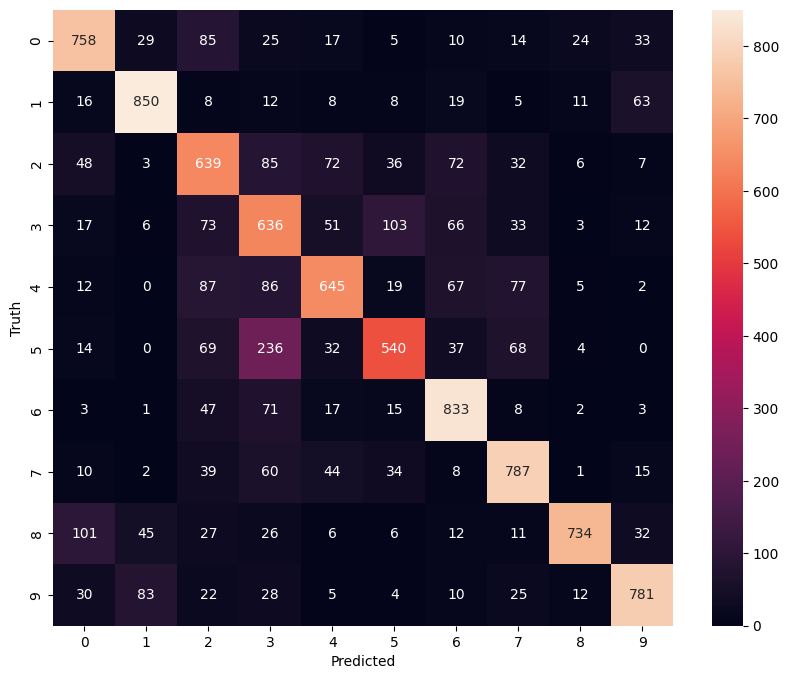

In [87]:
#confusion matrix
%pip install scikit-learn
import numpy as np
import seaborn as sns
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()